In [128]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import country_converter as coco
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from pprint import pprint

In [2]:
traindf = pd.read_csv('C:\\Users\\Shariq\\DATAS\\file\\Train.csv')
testdf = pd.read_csv('C:\\Users\\Shariq\\DATAS\\file\\Test.csv')

In [3]:
traindf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.00,41,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.00,35,0
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26,THAILAND,19.8,11.88,47,0
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,HONG KONG,27.0,0.00,48,0
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15,MALAYSIA,37.0,0.00,36,0


In [4]:
testdf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [5]:
traindf.shape

(52310, 11)

In [6]:
testdf.shape

(22421, 10)

In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB


In [8]:
traindf.describe(include='all')

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
count,52310.000000,52310,52310,52310,52310,52310.000000,52310,52310.000000,52310.000000,52310.000000,52310.000000
unique,NaN,16,2,2,25,NaN,97,NaN,NaN,NaN,NaN
top,NaN,EPX,Travel Agency,Online,Cancellation Plan,NaN,SINGAPORE,NaN,NaN,NaN,NaN
freq,NaN,26218,34996,51419,13254,NaN,14242,NaN,NaN,NaN,NaN
mean,6005.745804,NaN,NaN,NaN,NaN,58.256108,NaN,48.554673,12.219963,39.555725,0.166699
std,2306.450475,NaN,NaN,NaN,NaN,109.138708,NaN,60.198589,22.847645,13.762473,0.372710
min,2000.000000,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000,0.000000
25%,4015.000000,NaN,NaN,NaN,NaN,10.000000,NaN,19.800000,0.000000,33.000000,0.000000
50%,6002.000000,NaN,NaN,NaN,NaN,24.000000,NaN,29.500000,0.000000,36.000000,0.000000
75%,8004.000000,NaN,NaN,NaN,NaN,57.000000,NaN,55.000000,13.380000,43.000000,0.000000


In [9]:
traindf['ID'].nunique()

7992

In [10]:
from General_functions import Basic_exploration 

In [11]:
Basic_exploration(traindf)

Rows:52310,Cols:11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52310 entries, 0 to 52309
Data columns (total 11 columns):
ID                      52310 non-null int64
Agency                  52310 non-null object
Agency Type             52310 non-null object
Distribution Channel    52310 non-null object
Product Name            52310 non-null object
Duration                52310 non-null int64
Destination             52310 non-null object
Net Sales               52310 non-null float64
Commision (in value)    52310 non-null float64
Age                     52310 non-null int64
Claim                   52310 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ MB
None
Descriptive stats for numeric columns
                 ID      Duration     Net Sales  Commision (in value)  \
count  52310.000000  52310.000000  52310.000000          52310.000000   
mean    6005.745804     58.256108     48.554673             12.219963   
std     2306.450475    109.138708     60.198

[112.0, 112.0, 216.0, 112.0, 449.25, 245.8563467896543, 252.85, 291.75, 216.0, 112.0, 112.0, -128.7, 216.0, 252.85, 117.0, 252.85, 216.0, 180.0, 252.85, 187.85, 216.0, -69.3, 266.352666314604, 187.85, 252.85, 216.0, 216.0, 259.2, 216.0, 252.85, 112.0, 252.85, 254.75782816014262, 252.85, 252.85, 240.6694171886835, 112.0, 256.2, 216.0, 112.0, 291.75, 404.0, 291.75, 108.14190283426822, 192.0, 112.0, 259.2, 112.0, 112.0, 187.85, -389.0, 187.85, 283.03990151946095, 125.0, 187.85, 112.0, 252.85, 112.0, 112.0, -69.3, 216.0, 112.0, 112.0, 323.4, 185.0, 252.85, 229.8, 167.0, 323.4, 216.0, 216.0, 112.0, -49.5, 112.0, 270.8295490959985, 187.85, 291.75, 216.0, 333.0, 118.8, 404.25, 216.0, 298.3640434324098, 111.70344060872145, 189.0569678269577, 112.0, 122.79621810816666, 112.0, 148.5, 279.3335946436186, 279.5862845890506, 112.0, 252.85, 216.0, 112.0, 118.8, 148.5, 252.85, 112.0, 130.0, 228.5, 252.85, 158.4, 112.0, 216.0, 252.85, 108.9, -35.0, 112.0, 161.0, 141.3903057226384, 252.85, 148.5, 216.0,

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [12]:
traindf.nunique()

ID                      7992
Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              25
Duration                 439
Destination               97
Net Sales               6700
Commision (in value)    5101
Age                       99
Claim                      2
dtype: int64

In [13]:
print(traindf.groupby(['ID','Claim'])['Claim'].count().agg(['min','max']))

min     1
max    16
Name: Claim, dtype: int64


In [14]:
# claims done as per agency
agencyclaim = traindf.groupby(['Agency','Claim'])['Claim'].count()
print(agencyclaim)

Agency  Claim
ADM     0           56
ART     0          223
C2B     0         5438
        1         5177
CBH     0           75
        1            1
CCR     0          146
        1           10
CSR     0           59
        1            1
CWT     0         5965
        1          848
EPX     0        24338
        1         1880
JWT     0          519
        1           31
JZI     0         4363
        1          256
KML     0          266
        1           47
LWC     0          454
        1          352
RAB     0          526
        1            1
SSI     0          723
        1           57
TST     0          373
        1           21
TTW     0           66
        1           38
Name: Claim, dtype: int64


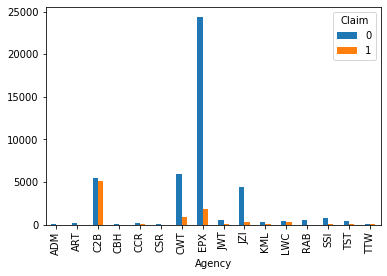

In [15]:
agencyclaim = traindf.groupby(['Agency','Claim'])['Claim'].count().unstack().plot(kind='bar')

In [16]:
print(traindf['Claim'].value_counts())
print(traindf['Claim'].count())

0    43590
1     8720
Name: Claim, dtype: int64
52310


In [17]:
# claims done as per Agency Type
Agency_Type_claim = traindf.groupby(['Agency Type','Claim'])['Claim'].count()
print(Agency_Type_claim)

Agency Type    Claim
Airlines       0        11792
               1         5522
Travel Agency  0        31798
               1         3198
Name: Claim, dtype: int64


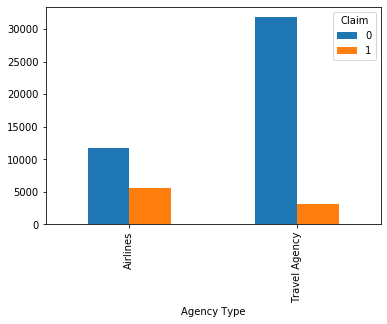

In [18]:
Agency_Type_claim = traindf.groupby(['Agency Type','Claim'])['Claim'].count().unstack().plot(kind='bar')

In [19]:
Agency_Type_claim = traindf.groupby(['Agency Type','Agency'])['Agency'].count()
print(Agency_Type_claim)

Agency Type    Agency
Airlines       ART         223
               C2B       10615
               JWT         550
               JZI        4619
               RAB         527
               SSI         780
Travel Agency  ADM          56
               CBH          76
               CCR         156
               CSR          60
               CWT        6813
               EPX       26218
               KML         313
               LWC         806
               TST         394
               TTW         104
Name: Agency, dtype: int64


In [20]:
# claims done as per Distribution
distribution_channel_claim = traindf.groupby(['Distribution Channel','Claim'])['Claim'].count()
print(distribution_channel_claim)

Distribution Channel  Claim
Offline               0          776
                      1          115
Online                0        42814
                      1         8605
Name: Claim, dtype: int64


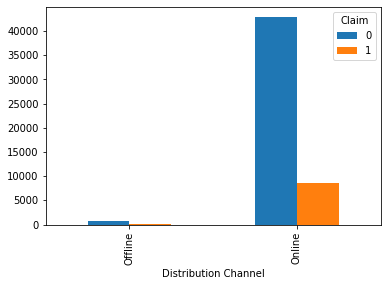

In [21]:
distchannelclaim = traindf.groupby(['Distribution Channel','Claim'])['Claim'].count().unstack().plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,6)

In [22]:
# claims done as per Product Name
product_claim = traindf.groupby(['Product Name','Claim'])['Claim'].count()
print(product_claim)

Product Name                          Claim
1 way Comprehensive Plan              0         2341
                                      1           68
2 way Comprehensive Plan              0         9098
                                      1         1457
24 Protect                            0          165
Annual Gold Plan                      0          123
                                      1          172
Annual Silver Plan                    0          897
                                      1         1451
Annual Travel Protect Gold            0           63
                                      1          120
Annual Travel Protect Platinum        0           36
                                      1           14
Annual Travel Protect Silver          0           61
                                      1           31
Basic Plan                            0         3796
                                      1          246
Bronze Plan                           0         2703
  

<Figure size 1440x216 with 0 Axes>

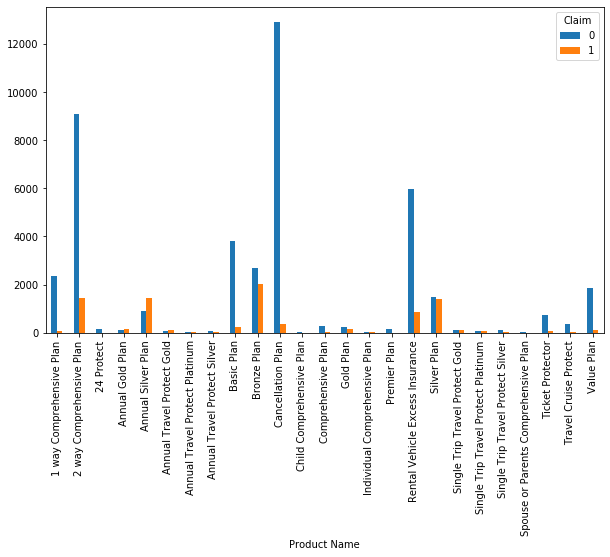

In [23]:
plt.figure(figsize=(20,3))
prodnameclaim = traindf.groupby(['Product Name','Claim'])['Claim'].count().unstack().plot(kind='bar')
plt.rcParams['figure.figsize'] = (10,6)

In [24]:
def age_group(Age):
    if Age<2:
        return 'infant'
    elif Age<18:
        return 'kid'
    elif Age<60:
        return 'Adult'
    else:
        return 'Senior'
traindf['Age_group']=traindf['Age'].map(age_group)

In [25]:
age_claim = traindf.groupby(['Age_group','Claim'])['Claim'].count()
print(age_claim)

Age_group  Claim
Adult      0        40678
           1         8295
Senior     0         2826
           1          414
infant     0            5
kid        0           81
           1           11
Name: Claim, dtype: int64


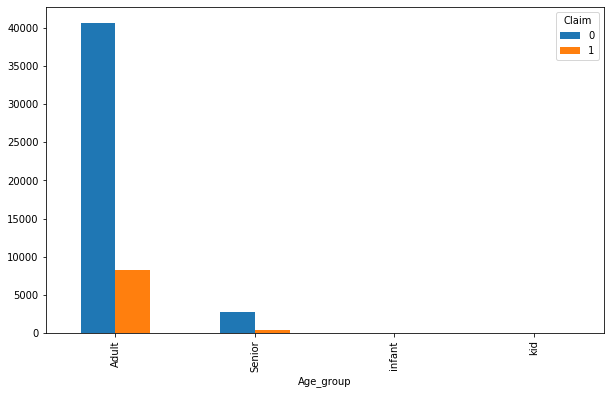

In [26]:
age_claim = traindf.groupby(['Age_group','Claim'])['Claim'].count().unstack().plot(kind='bar')
plt.show()

In [27]:
# We are considering Duration into Hours and found that 4 records have negative value
traindf[traindf['Duration']<=0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group
1270,2274,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,0.51,0.14,48,0,Adult
1363,2359,C2B,Airlines,Online,Bronze Plan,0,SINGAPORE,27.00,6.75,23,0,Adult
2081,3412,JWT,Airlines,Online,Value Plan,0,INDIA,62.00,24.80,118,0,Senior
3191,7964,JWT,Airlines,Online,Value Plan,0,INDIA,31.00,12.40,118,0,Senior
7706,7433,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,14.40,4.04,48,0,Adult
8956,3119,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.03,0.29,48,0,Adult
11047,7371,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,3.99,1.12,48,0,Adult
11211,4807,C2B,Airlines,Online,Silver Plan,0,SINGAPORE,0.00,5.63,51,0,Adult
11523,9450,JZI,Airlines,Online,Basic Plan,-1,INDONESIA,18.00,6.30,118,0,Senior
12766,3624,SSI,Airlines,Online,Ticket Protector,0,SINGAPORE,1.93,0.54,48,0,Adult


In [106]:
traindf[traindf['Net Sales']<=0]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
33,6138,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,4.0,Thailand,0.0,17.82,30.000000,0,Adult,0.166667,0-7 Days,Asia,South East Asia
62,5266,C2B,Airlines,Online,Bronze Plan,77.0,Singapore,0.0,15.00,28.000000,0,Adult,3.208333,0-7 Days,Asia,South East Asia
83,5146,EPX,Travel Agency,Online,2 way Comprehensive Plan,14.0,Egypt,0.0,0.00,44.000000,0,Adult,0.583333,0-7 Days,Africa,Africa
104,9734,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,81.0,United kingdom,-128.7,77.22,63.000000,0,Senior,3.375000,0-7 Days,Europe,Europe
120,3642,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,13.0,Malaysia,0.0,11.88,62.000000,0,Senior,0.541667,0-7 Days,Asia,South East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52211,8049,EPX,Travel Agency,Online,1 way Comprehensive Plan,8.0,China,0.0,0.00,63.000000,0,Senior,0.333333,0-7 Days,Asia,Asia
52213,8297,JZI,Airlines,Online,Value Plan,70.0,United states,0.0,25.55,39.555725,0,Senior,2.916667,0-7 Days,America,America
52220,9266,EPX,Travel Agency,Online,Cancellation Plan,150.0,Myanmar,0.0,0.00,36.000000,0,Adult,6.250000,0-7 Days,Asia,South East Asia
52242,4079,EPX,Travel Agency,Online,Cancellation Plan,261.0,United states,-80.0,0.00,71.000000,0,Senior,10.875000,8-18 Days,America,America


In [111]:
traindf[traindf["Net Sales"] == 128.70]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
2583,3409,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,37.0,Japan,128.7,77.22,46.0,0,Adult,1.541667,0-7 Days,Asia,Asia
3031,4688,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,132.0,Italy,128.7,77.22,31.0,0,Adult,5.500000,0-7 Days,Europe,Europe
3669,4601,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,46.0,New zealand,128.7,77.22,31.0,0,Adult,1.916667,0-7 Days,Oceania,Oceania
3943,7695,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,23.0,United kingdom,128.7,77.22,60.0,0,Senior,0.958333,0-7 Days,Europe,Europe
6362,2941,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,51.0,Hungary,128.7,77.22,31.0,0,Adult,2.125000,0-7 Days,Europe,Europe
6497,9628,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,135.0,Portugal,128.7,77.22,31.0,0,Adult,5.625000,0-7 Days,Europe,Europe
6932,6387,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,54.0,New zealand,128.7,77.22,34.0,0,Adult,2.250000,0-7 Days,Oceania,Oceania
7150,2718,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,20.0,Cyprus,128.7,77.22,54.0,0,Adult,0.833333,0-7 Days,Asia,Asia
9287,9801,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,189.0,Australia,128.7,77.22,37.0,0,Adult,7.875000,8-18 Days,Oceania,Oceania
11542,3794,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,37.0,United states,128.7,77.22,44.0,0,Adult,1.541667,0-7 Days,America,America


In [112]:
traindf.loc[traindf['Duration'] <= 0, 'Duration'] = traindf['Duration'].mean()
traindf.loc[traindf['Age'] > 100, 'Age'] = traindf['Age'].mean() 
traindf.loc[traindf['Net Sales'] < 0, 'Net Sales'] = traindf['Net Sales'].mean()

In [29]:
traindf['Duration_Days']=[i/24 for i in traindf['Duration']]

In [30]:
traindf['Duration_Days_Type']=pd.cut(traindf['Duration_Days'],bins=[0,7,18,5000], labels=["0-7 Days","8-18 Days","19 & Above"])

In [31]:
Duration_claims = traindf.groupby(['Duration_Days_Type','Claim'])['Claim'].count()
Duration_claims

Duration_Days_Type  Claim
0-7 Days            0        41222
                    1         6774
8-18 Days           0         2322
                    1         1946
19 & Above          0           46
Name: Claim, dtype: int64

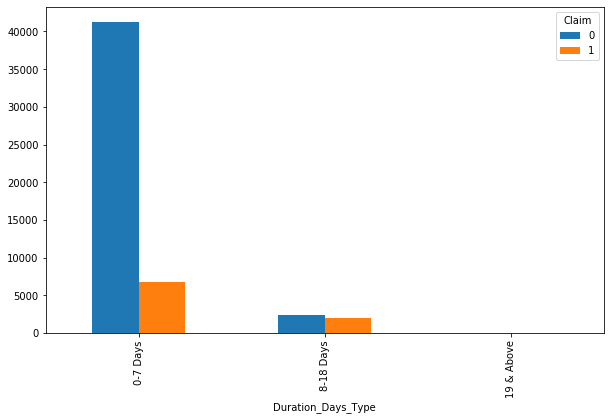

In [32]:
Duration_claims = traindf.groupby(['Duration_Days_Type','Claim'])['Claim'].count().unstack().plot(kind='bar')
plt.show()

In [33]:
Destination_unique_values = traindf['Destination'].unique()
print(Destination_unique_values)

['PHILIPPINES' 'MALAYSIA' 'THAILAND' 'HONG KONG' 'UNITED KINGDOM'
 'VIET NAM' 'CHINA' 'SINGAPORE' 'JAPAN' 'INDONESIA' 'UNITED ARAB EMIRATES'
 'BRUNEI DARUSSALAM' 'UNITED STATES' 'CANADA' 'INDIA' 'KOREA, REPUBLIC OF'
 'CAMBODIA' 'AUSTRALIA' 'MONGOLIA' 'SOUTH AFRICA' 'EGYPT' 'CZECH REPUBLIC'
 'GERMANY' 'NEPAL' 'PAKISTAN' 'FRANCE' 'MYANMAR'
 'TAIWAN, PROVINCE OF CHINA' 'SPAIN' 'NEW ZEALAND' 'ISRAEL' 'NETHERLANDS'
 'NORWAY' 'SRI LANKA' 'FINLAND' 'IRELAND' 'ITALY' 'ICELAND' 'DENMARK'
 'SAUDI ARABIA' 'SWITZERLAND' 'MACAO' 'UKRAINE' 'PORTUGAL' 'BELGIUM'
 'HUNGARY' 'GREECE' 'MALDIVES' "LAO PEOPLE'S DEMOCRATIC REPUBLIC"
 'MOROCCO' 'KAZAKHSTAN' 'TURKEY' 'MAURITIUS' 'BANGLADESH' 'PERU' 'SWEDEN'
 'KENYA' 'FIJI' 'CYPRUS' 'BRAZIL' 'RUSSIAN FEDERATION' 'MEXICO' 'AUSTRIA'
 'TANZANIA, UNITED REPUBLIC OF' 'LEBANON' 'POLAND' 'ROMANIA' 'SLOVENIA'
 'BELARUS' 'MALTA' 'OMAN' 'UZBEKISTAN' 'COLOMBIA' 'QATAR' 'CROATIA'
 'GEORGIA' 'ARGENTINA' 'ESTONIA' 'VENEZUELA' 'LITHUANIA' 'COSTA RICA'
 'LUXEMBOURG' 'BOLIVIA'

In [34]:
traindf['Destination']=[i.capitalize() for i in traindf['Destination']]

In [35]:
country_names=list(traindf['Destination'])
country_names

['Philippines',
 'Malaysia',
 'Thailand',
 'Hong kong',
 'Malaysia',
 'Thailand',
 'United kingdom',
 'Viet nam',
 'China',
 'Singapore',
 'China',
 'Singapore',
 'Malaysia',
 'Singapore',
 'Singapore',
 'Viet nam',
 'Japan',
 'Indonesia',
 'United arab emirates',
 'Singapore',
 'Malaysia',
 'Malaysia',
 'United arab emirates',
 'Singapore',
 'Brunei darussalam',
 'Singapore',
 'United arab emirates',
 'United states',
 'United states',
 'Indonesia',
 'Philippines',
 'Singapore',
 'China',
 'Thailand',
 'Indonesia',
 'China',
 'United states',
 'Canada',
 'Thailand',
 'Thailand',
 'Thailand',
 'China',
 'Malaysia',
 'China',
 'Malaysia',
 'Malaysia',
 'India',
 'Korea, republic of',
 'Korea, republic of',
 'Cambodia',
 'Thailand',
 'Malaysia',
 'United states',
 'Singapore',
 'China',
 'United states',
 'Malaysia',
 'Indonesia',
 'Singapore',
 'United kingdom',
 'Malaysia',
 'Singapore',
 'Singapore',
 'Australia',
 'Mongolia',
 'Singapore',
 'United states',
 'Viet nam',
 'Malaysia',


In [36]:
converter=coco.CountryConverter()

In [37]:
traindf['Continent']=converter.convert(names=country_names,to="continent")

In [38]:
traindf['Continent'].value_counts()

Asia       42117
Europe      3806
Oceania     3412
America     2752
Africa       223
Name: Continent, dtype: int64

In [39]:
traindf.groupby(['Continent'])['Claim'].value_counts()

Continent  Claim
Africa     0          172
           1           51
America    0         2292
           1          460
Asia       0        34719
           1         7398
Europe     0         3463
           1          343
Oceania    0         2944
           1          468
Name: Claim, dtype: int64

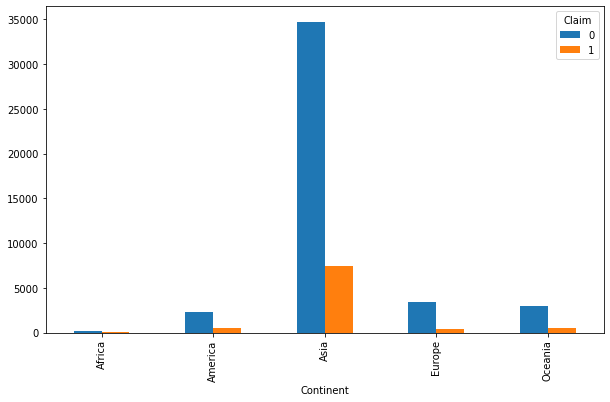

In [40]:
traindf.groupby(['Continent'])['Claim'].value_counts().unstack().plot(kind="bar")
plt.show()

In [41]:
round(traindf["Destination"].value_counts()/traindf.shape[0]*100,2)

Singapore       27.23
Thailand         8.72
Malaysia         8.33
China            7.47
Australia        5.76
                ...  
Bermuda          0.00
Bhutan           0.00
Belarus          0.00
Turkmenistan     0.00
Zambia           0.00
Name: Destination, Length: 97, dtype: float64

In [42]:
def Countries (abc):
    if abc=="Singapore":
        return("South East Asia")
    elif abc == "Thailand":
        return("South East Asia")
    elif abc=="Malaysia":
        return("South East Asia")
    elif abc=="Indonesia":
        return("South East Asia")
    elif abc=="Philippines":
        return("South East Asia")
    elif abc=="Viet nam":
        return("South East Asia")
    elif abc=="Myanmar":
        return("South East Asia")
    elif abc=="Cambodia":
        return("South East Asia")
    elif abc=="Lao people's democratic republic":
        return("South East Asia")
    elif abc=="Brunei darussalam":
        return("South East Asia")
    else:
        return(abc)

In [43]:
traindf['Region']=traindf["Destination"].map(Countries)
traindf

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,Philippines,12.000000,0.0000,41.0,0,Adult,2.541667,0-7 Days,Asia,South East Asia
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,Malaysia,17.000000,0.0000,35.0,0,Adult,0.166667,0-7 Days,Asia,South East Asia
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,Thailand,19.800000,11.8800,47.0,0,Adult,1.083333,0-7 Days,Asia,South East Asia
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Hong kong,27.000000,0.0000,48.0,0,Adult,0.625000,0-7 Days,Asia,Hong kong
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Malaysia,37.000000,0.0000,36.0,0,Adult,0.625000,0-7 Days,Asia,South East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365.0,Singapore,444.750593,111.1858,40.0,1,Adult,15.208333,8-18 Days,Asia,South East Asia
52306,5282,RAB,Airlines,Online,Value Plan,8.0,Brunei darussalam,23.000000,9.2000,54.0,0,Adult,0.333333,0-7 Days,Asia,South East Asia
52307,7083,C2B,Airlines,Online,Bronze Plan,38.0,Singapore,61.100000,15.2800,37.0,0,Adult,1.583333,0-7 Days,Asia,South East Asia
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2.0,Thailand,10.000000,0.0000,46.0,0,Adult,0.083333,0-7 Days,Asia,South East Asia


In [44]:
traindf['Region'] = np.where((traindf['Region'] == 'South East Asia'), traindf['Region'],traindf['Continent'] )

In [45]:
traindf

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,Philippines,12.000000,0.0000,41.0,0,Adult,2.541667,0-7 Days,Asia,South East Asia
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,Malaysia,17.000000,0.0000,35.0,0,Adult,0.166667,0-7 Days,Asia,South East Asia
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,Thailand,19.800000,11.8800,47.0,0,Adult,1.083333,0-7 Days,Asia,South East Asia
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Hong kong,27.000000,0.0000,48.0,0,Adult,0.625000,0-7 Days,Asia,Asia
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Malaysia,37.000000,0.0000,36.0,0,Adult,0.625000,0-7 Days,Asia,South East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365.0,Singapore,444.750593,111.1858,40.0,1,Adult,15.208333,8-18 Days,Asia,South East Asia
52306,5282,RAB,Airlines,Online,Value Plan,8.0,Brunei darussalam,23.000000,9.2000,54.0,0,Adult,0.333333,0-7 Days,Asia,South East Asia
52307,7083,C2B,Airlines,Online,Bronze Plan,38.0,Singapore,61.100000,15.2800,37.0,0,Adult,1.583333,0-7 Days,Asia,South East Asia
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2.0,Thailand,10.000000,0.0000,46.0,0,Adult,0.083333,0-7 Days,Asia,South East Asia


In [46]:
traindf.groupby("Region")['Claim'].value_counts()

Region           Claim
Africa           0          172
                 1           51
America          0         2292
                 1          460
Asia             0        10617
                 1         1198
Europe           0         3463
                 1          343
Oceania          0         2944
                 1          468
South East Asia  0        24102
                 1         6200
Name: Claim, dtype: int64

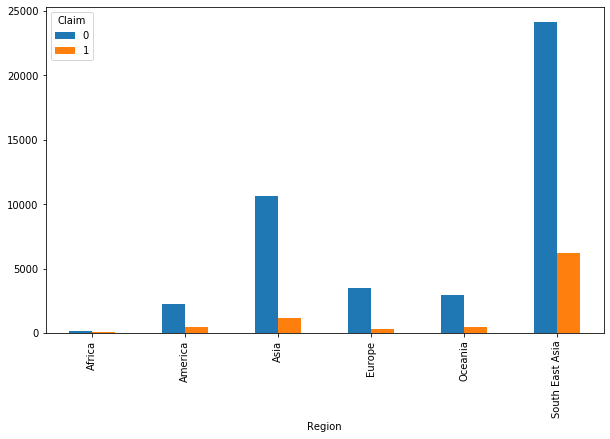

<Figure size 1080x720 with 0 Axes>

In [47]:
traindf.groupby("Region")['Claim'].value_counts().unstack().plot(kind='bar')
plt.figure(figsize=(15,10))
plt.show()

In [48]:
traindf['Duration'].dtypes

dtype('float64')

In [49]:
traindf.iloc[40947:40955]

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
40947,9583,EPX,Travel Agency,Online,Cancellation Plan,28.000000,"Taiwan, province of china",16.000000,0.000000,36.000000,0,Adult,1.166667,0-7 Days,Asia,Asia
40948,3989,JWT,Airlines,Online,Value Plan,58.256108,India,62.000000,24.800000,39.555725,0,Senior,2.427338,0-7 Days,Asia,Asia
40949,4968,EPX,Travel Agency,Online,2 way Comprehensive Plan,25.000000,Thailand,25.891168,0.000000,33.000000,1,Adult,1.041667,0-7 Days,Asia,South East Asia
40950,5490,JZI,Airlines,Online,Basic Plan,81.000000,Thailand,22.000000,7.700000,26.000000,0,Adult,3.375000,0-7 Days,Asia,South East Asia
40951,9286,C2B,Airlines,Online,Bronze Plan,16.000000,Singapore,26.532078,6.637925,27.000000,1,Adult,0.666667,0-7 Days,Asia,South East Asia
40952,9023,EPX,Travel Agency,Online,Cancellation Plan,33.000000,Philippines,20.000000,0.000000,36.000000,0,Adult,1.375000,0-7 Days,Asia,South East Asia
40953,3317,EPX,Travel Agency,Online,2 way Comprehensive Plan,51.000000,New zealand,112.000000,0.000000,36.000000,0,Adult,2.125000,0-7 Days,Oceania,Oceania
40954,9494,TST,Travel Agency,Offline,Travel Cruise Protect,9.000000,Thailand,30.000000,10.500000,17.000000,0,kid,0.375000,0-7 Days,Asia,South East Asia


In [50]:
traindf

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,Philippines,12.000000,0.0000,41.0,0,Adult,2.541667,0-7 Days,Asia,South East Asia
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,Malaysia,17.000000,0.0000,35.0,0,Adult,0.166667,0-7 Days,Asia,South East Asia
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,Thailand,19.800000,11.8800,47.0,0,Adult,1.083333,0-7 Days,Asia,South East Asia
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Hong kong,27.000000,0.0000,48.0,0,Adult,0.625000,0-7 Days,Asia,Asia
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Malaysia,37.000000,0.0000,36.0,0,Adult,0.625000,0-7 Days,Asia,South East Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52305,5370,C2B,Airlines,Online,Annual Gold Plan,365.0,Singapore,444.750593,111.1858,40.0,1,Adult,15.208333,8-18 Days,Asia,South East Asia
52306,5282,RAB,Airlines,Online,Value Plan,8.0,Brunei darussalam,23.000000,9.2000,54.0,0,Adult,0.333333,0-7 Days,Asia,South East Asia
52307,7083,C2B,Airlines,Online,Bronze Plan,38.0,Singapore,61.100000,15.2800,37.0,0,Adult,1.583333,0-7 Days,Asia,South East Asia
52308,8523,EPX,Travel Agency,Online,Cancellation Plan,2.0,Thailand,10.000000,0.0000,46.0,0,Adult,0.083333,0-7 Days,Asia,South East Asia


In [51]:
def Product_Names(abc):
    if abc=="Cancellation Plan":
        return("Cancellation Plan")
    elif abc=="2 way Comprehensive Plan":
        return("2 way Comprehensive Plan")
    elif abc=="Rental Vehicle Excess Insurance":
        return("Rental Vehicle Excess Insurance")
    elif abc=="Bronze Plan":
        return("Bronze Plan")
    elif abc=="Basic Plan":
        return("Basic Plan")
    elif abc=="Silver Plan":
        return("Silver Plan")
    elif abc=='1 way Comprehensive Plan':
        return("1 way Comprehensive Plan")
    elif abc=="Annual Silver Plan":
        return("Annual Silver Plan")
    elif abc=="Value Plan":
        return("Value Plan")
    elif abc=="Ticket Protector":
        return('Ticket Protector')
    else:
        return("Others")       

In [52]:
traindf['Product Name']=traindf['Product Name'].map(Product_Names)

In [53]:
def Agencies(num):
    if num=="EPX":
        return("EPX")
    elif num=="C2B":
        return("C2B")
    elif num=="CWT":
        return("CWT")
    elif num=="JZI":
        return("JZI")
    else:
        return("Others")

In [54]:
traindf['Agency']=traindf['Agency'].map(Agencies)

In [113]:
traindf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age_group,Duration_Days,Duration_Days_Type,Continent,Region
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61.0,Philippines,12.0,0.00,41.0,0,Adult,2.541667,0-7 Days,Asia,South East Asia
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4.0,Malaysia,17.0,0.00,35.0,0,Adult,0.166667,0-7 Days,Asia,South East Asia
2,9251,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,26.0,Thailand,19.8,11.88,47.0,0,Adult,1.083333,0-7 Days,Asia,South East Asia
3,4754,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Hong kong,27.0,0.00,48.0,0,Adult,0.625000,0-7 Days,Asia,Asia
4,8840,EPX,Travel Agency,Online,2 way Comprehensive Plan,15.0,Malaysia,37.0,0.00,36.0,0,Adult,0.625000,0-7 Days,Asia,South East Asia


In [114]:
x = traindf.drop(['ID','Agency Type','Duration','Destination','Age_group','Duration_Days_Type','Continent','Claim'],axis=1)

In [115]:
x.head()

,Agency,Distribution Channel,Product Name,Net Sales,Commision (in value),Age,Duration_Days,Region
0,EPX,Online,Cancellation Plan,12.0,0.00,41.0,2.541667,South East Asia
1,EPX,Online,Cancellation Plan,17.0,0.00,35.0,0.166667,South East Asia
2,CWT,Online,Rental Vehicle Excess Insurance,19.8,11.88,47.0,1.083333,South East Asia
3,EPX,Online,2 way Comprehensive Plan,27.0,0.00,48.0,0.625000,Asia
4,EPX,Online,2 way Comprehensive Plan,37.0,0.00,36.0,0.625000,South East Asia


In [116]:
x = pd.get_dummies(x)

In [117]:
x.head()

,Net Sales,Commision (in value),Age,Duration_Days,Agency_C2B,Agency_CWT,Agency_EPX,Agency_JZI,Agency_Others,Distribution Channel_Offline,...,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Ticket Protector,Product Name_Value Plan,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Oceania,Region_South East Asia
0,12.0,0.00,41.0,2.541667,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,17.0,0.00,35.0,0.166667,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,19.8,11.88,47.0,1.083333,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,27.0,0.00,48.0,0.625000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,37.0,0.00,36.0,0.625000,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
y = traindf['Claim']

In [61]:
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=2, verbose=3)
rfe.fit(x, y)
for col, rank in zip(x.columns, rfe.ranking_):
    print(col, ' - ', rank)

Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Net Sales  -  1
Commision (in value)  -  1
Age  -  3
Duration_Days  -  

In [119]:
rfr=RandomForestClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()

In [120]:
model={0:(lr,'LogisticRegressor'),1:(rfr,'RandomForestClassifier'),2:(dt,'DecisionTreeClassifier')}

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=7)

In [122]:
from imblearn.over_sampling import RandomOverSampler

In [123]:
ros=RandomOverSampler()
x_train_ros,y_train_ros=ros.fit_resample(x_train,y_train)

In [124]:
results = []
for i in model.keys():
    mod = model[i][0]
    name = model[i][1]
    mod.fit(x_train_ros, y_train_ros)
    y_pred = mod.predict(x_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    accuracy = accuracy_score(y_test,y_pred)
    classif = classification_report(y_test,y_pred)
    print(i)
    print(classif)
    results.append((name,precision,recall,accuracy))
result_df = pd.DataFrame(results)
result_df.columns = ['model','precision','recall','accuracy']
result_df.sort_values('precision',ascending=False,inplace=True)

C:\Users\Shariq\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     13121
           1       0.41      0.71      0.52      2572

    accuracy                           0.79     15693
   macro avg       0.67      0.76      0.69     15693
weighted avg       0.85      0.79      0.81     15693

1
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     13121
           1       0.77      0.81      0.79      2572

    accuracy                           0.93     15693
   macro avg       0.87      0.88      0.87     15693
weighted avg       0.93      0.93      0.93     15693

2
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     13121
           1       0.74      0.74      0.74      2572

    accuracy                           0.91     15693
   macro avg       0.84      0.84      0.84     15693
weighted avg       0.91      0.91      0.91     15693



In [125]:
result_df

,model,precision,recall,accuracy
1,RandomForestClassifier,0.769487,0.809876,0.929077
2,DecisionTreeClassifier,0.740640,0.738336,0.914739
0,LogisticRegressor,0.414766,0.714230,0.787995


In [103]:
confusion_matrix(y_test, y_pred, labels= [1,0])

array([[ 1919,   653],
       [  677, 12444]], dtype=int64)

In [104]:
tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

In [105]:
tn, fp, fn, tp

(1919, 677, 653, 12444)

In [69]:
testdf.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age'],
      dtype='object')

In [70]:
traindf.columns

Index(['ID', 'Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Duration', 'Destination', 'Net Sales', 'Commision (in value)', 'Age',
       'Claim', 'Age_group', 'Duration_Days', 'Duration_Days_Type',
       'Continent', 'Region'],
      dtype='object')

In [71]:
x.columns

Index(['Net Sales', 'Commision (in value)', 'Age', 'Duration_Days',
       'Agency_C2B', 'Agency_CWT', 'Agency_EPX', 'Agency_JZI', 'Agency_Others',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan',
       'Product Name_Annual Silver Plan', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Others', 'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan', 'Product Name_Ticket Protector',
       'Product Name_Value Plan', 'Region_Africa', 'Region_America',
       'Region_Asia', 'Region_Europe', 'Region_Oceania',
       'Region_South East Asia'],
      dtype='object')

In [72]:
testdf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.00,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.00,36
2,14139,C2B,Airlines,Online,Bronze Plan,13,SINGAPORE,13.5,3.38,24
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133,"TAIWAN, PROVINCE OF CHINA",41.0,0.00,36
4,16439,C2B,Airlines,Online,Silver Plan,2,SINGAPORE,30.0,7.50,32


In [73]:
testdf.loc[testdf['Duration'] <= 0, 'Duration'] = testdf['Duration'].mean()
testdf.loc[testdf['Age'] > 100, 'Age'] = testdf['Age'].mean() 

In [74]:
testdf['Duration_Days']=[i/24 for i in testdf['Duration']]

In [75]:
testdf['Destination']=[i.capitalize() for i in testdf['Destination']]

In [76]:
country_names1=list(testdf['Destination'])
country_names1

['Hong kong',
 'Singapore',
 'Singapore',
 'Taiwan, province of china',
 'Singapore',
 'Singapore',
 'Viet nam',
 'Singapore',
 'France',
 'Japan',
 'Viet nam',
 'Singapore',
 'India',
 'Thailand',
 'United kingdom',
 'China',
 'Singapore',
 'Malaysia',
 'Australia',
 'China',
 'Australia',
 'United states',
 'India',
 'Thailand',
 'Australia',
 'Singapore',
 'India',
 'China',
 'Australia',
 'India',
 'Australia',
 'India',
 'Hong kong',
 'Japan',
 'Philippines',
 'Malaysia',
 'Thailand',
 'Hong kong',
 'Singapore',
 'Thailand',
 'United states',
 'Australia',
 'Singapore',
 'Australia',
 'Singapore',
 'Indonesia',
 'Canada',
 'Korea, republic of',
 'Indonesia',
 'Italy',
 'Thailand',
 'Taiwan, province of china',
 'Philippines',
 'Australia',
 'India',
 'Philippines',
 'Singapore',
 'Nepal',
 'Philippines',
 'Singapore',
 'China',
 'Thailand',
 'Singapore',
 'Malaysia',
 'Indonesia',
 'Singapore',
 'Singapore',
 'Germany',
 'Thailand',
 'Japan',
 'Brunei darussalam',
 'Thailand',
 'A

In [77]:
testdf['Continent']=converter.convert(names=country_names1,to="continent")

In [78]:
def Countries (abc):
    if abc=="Singapore":
        return("South East Asia")
    elif abc == "Thailand":
        return("South East Asia")
    elif abc=="Malaysia":
        return("South East Asia")
    elif abc=="Indonesia":
        return("South East Asia")
    elif abc=="Philippines":
        return("South East Asia")
    elif abc=="Viet nam":
        return("South East Asia")
    elif abc=="Myanmar":
        return("South East Asia")
    elif abc=="Cambodia":
        return("South East Asia")
    elif abc=="Lao people's democratic republic":
        return("South East Asia")
    elif abc=="Brunei darussalam":
        return("South East Asia")
    else:
        return(abc)

In [79]:
testdf['Region']=testdf["Destination"].map(Countries)
testdf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Duration_Days,Continent,Region
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192.0,Hong kong,18.0,0.00,36.0,8.000000,Asia,Hong kong
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2.0,Singapore,20.0,0.00,36.0,0.083333,Asia,South East Asia
2,14139,C2B,Airlines,Online,Bronze Plan,13.0,Singapore,13.5,3.38,24.0,0.541667,Asia,South East Asia
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133.0,"Taiwan, province of china",41.0,0.00,36.0,5.541667,Asia,"Taiwan, province of china"
4,16439,C2B,Airlines,Online,Silver Plan,2.0,Singapore,30.0,7.50,32.0,0.083333,Asia,South East Asia


In [80]:
testdf['Region'] = np.where((testdf['Region'] == 'South East Asia'), testdf['Region'],testdf['Continent'] )

In [81]:
testdf['Product Name']=testdf['Product Name'].map(Product_Names)

In [82]:
testdf['Agency']=testdf['Agency'].map(Agencies)

In [83]:
testdf.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Duration_Days,Continent,Region
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192.0,Hong kong,18.0,0.00,36.0,8.000000,Asia,Asia
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2.0,Singapore,20.0,0.00,36.0,0.083333,Asia,South East Asia
2,14139,C2B,Airlines,Online,Bronze Plan,13.0,Singapore,13.5,3.38,24.0,0.541667,Asia,South East Asia
3,19754,EPX,Travel Agency,Online,2 way Comprehensive Plan,133.0,"Taiwan, province of china",41.0,0.00,36.0,5.541667,Asia,Asia
4,16439,C2B,Airlines,Online,Silver Plan,2.0,Singapore,30.0,7.50,32.0,0.083333,Asia,South East Asia


In [84]:
x1 = testdf.drop(['ID','Agency Type','Duration','Destination','Continent'],axis=1)

In [85]:
x1.head()

,Agency,Distribution Channel,Product Name,Net Sales,Commision (in value),Age,Duration_Days,Region
0,EPX,Online,Cancellation Plan,18.0,0.00,36.0,8.000000,Asia
1,EPX,Online,1 way Comprehensive Plan,20.0,0.00,36.0,0.083333,South East Asia
2,C2B,Online,Bronze Plan,13.5,3.38,24.0,0.541667,South East Asia
3,EPX,Online,2 way Comprehensive Plan,41.0,0.00,36.0,5.541667,Asia
4,C2B,Online,Silver Plan,30.0,7.50,32.0,0.083333,South East Asia


In [86]:
x1 = pd.get_dummies(x1)

In [87]:
x1.head()

,Net Sales,Commision (in value),Age,Duration_Days,Agency_C2B,Agency_CWT,Agency_EPX,Agency_JZI,Agency_Others,Distribution Channel_Offline,...,Product Name_Rental Vehicle Excess Insurance,Product Name_Silver Plan,Product Name_Ticket Protector,Product Name_Value Plan,Region_Africa,Region_America,Region_Asia,Region_Europe,Region_Oceania,Region_South East Asia
0,18.0,0.00,36.0,8.000000,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,20.0,0.00,36.0,0.083333,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,13.5,3.38,24.0,0.541667,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,41.0,0.00,36.0,5.541667,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,30.0,7.50,32.0,0.083333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [88]:
x1.columns

Index(['Net Sales', 'Commision (in value)', 'Age', 'Duration_Days',
       'Agency_C2B', 'Agency_CWT', 'Agency_EPX', 'Agency_JZI', 'Agency_Others',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan',
       'Product Name_Annual Silver Plan', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Others', 'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan', 'Product Name_Ticket Protector',
       'Product Name_Value Plan', 'Region_Africa', 'Region_America',
       'Region_Asia', 'Region_Europe', 'Region_Oceania',
       'Region_South East Asia'],
      dtype='object')

In [89]:
features = ['Net Sales', 'Commision (in value)', 'Age', 'Duration_Days',
       'Agency_C2B', 'Agency_CWT', 'Agency_EPX', 'Agency_JZI', 'Agency_Others',
       'Distribution Channel_Offline', 'Distribution Channel_Online',
       'Product Name_1 way Comprehensive Plan',
       'Product Name_2 way Comprehensive Plan',
       'Product Name_Annual Silver Plan', 'Product Name_Basic Plan',
       'Product Name_Bronze Plan', 'Product Name_Cancellation Plan',
       'Product Name_Others', 'Product Name_Rental Vehicle Excess Insurance',
       'Product Name_Silver Plan', 'Product Name_Ticket Protector',
       'Product Name_Value Plan', 'Region_Africa', 'Region_America',
       'Region_Asia', 'Region_Europe', 'Region_Oceania',
       'Region_South East Asia']
target = 'Claim'

In [90]:
final_model = RandomForestClassifier()

In [91]:
final_model.fit(x[features],traindf[target]) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [92]:
predictions = final_model.predict(x1[features])

In [93]:
submit = pd.DataFrame({'ID':testdf['ID'],'Claim':predictions})

In [94]:
submit

,ID,Claim
0,17631,0
1,15064,0
2,14139,0
3,19754,0
4,16439,0
...,...,...
22416,13227,0
22417,12767,1
22418,13638,0
22419,14859,0


In [95]:
submit.to_csv("Submission File.csv", index=False)